## Import Packages
* numpy - package for scientific computing with Python
* matplotlib.pyplot - plotting framework

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Import Keras models
* Sequential - basic keras model composed of a linear stack of layers.
* model_from_json - Loads a saved model from a json file

In [2]:
from keras.models import Sequential
from keras.models import model_from_json

Using TensorFlow backend.
/Users/sviras/anaconda3/envs/tensorflow-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/sviras/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/pydot.py:17: UserWarning: Couldn't import dot_parser, loading of dot files will not be possible.
  "Couldn't import dot_parser, "


## Import Keras Layers
* Conv2D- 2D convolution layer
* MaxPooling2D - Max pooling operation for spatial data.
* Flatten - Flattens the input. Does not affect the batch size.
* Dense - regular densely-connected NN layer.

In [3]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

## Import preprocessing packages
* image - image preprocessing package
* ImageDataGenerator - Generate batches of tensor image data with real-time data augmentation. 

In [4]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

## Build the classifier model
* Build a CNN.CNN has mostly four fucntions:
    * Convolution: Add the first layer which is a convolutional layer. Set the number of filters as 32, the shape of each filter as 3x3 and the input shape and the type of image as 50,50,3 i.e. the input is of a 50x50 RGB image and the activation function as relu.
    * Pooling: Add a pooling layer to reduce the total number of nodes for the upcoming layers. It takes a 2x2 matrix thus giving minimum pixel loss and a precise region where the features are located.
    * Flatten : Flattens the pooled images.
    * Dense : add a fully connected layer to feed the images to the output layer. Set the number of nodes as 256, as its a common practice to use a power of 2 and a rectifier function asthe activation function, relu.

* Define the output layer. Set number of units to 1 as this is a binary classifier and sigmoid as the activation function
* Compile the model. Set adam as the optimizer and binary_crossentropy as the loss fucntion, as this is a binary classifier.

In [5]:
classifier = Sequential()

In [6]:
classifier.add(Conv2D(32, (3, 3), input_shape = (50, 50, 3), activation = 'relu'))

In [7]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [8]:
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [9]:
classifier.add(Flatten())

In [10]:
classifier.add(Dense(units = 256, activation = 'relu'))

In [11]:
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [12]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Fitting the CNN to the images
* Improve the dataset using the ImageDataGenerator method which generate batches of tensor image data with real-time data augmentation. 
    * rescale: rescaling factor. If None or 0, no rescaling is applied, otherwise the data is multiplied by the value provided.
    * shear_range: Shear Intensity
    * zoom_range: Range for random zoom.
    * horizontal_flip: Randomly flip inputs horizontally if true.
* Define the training and test datasets using the flow_from_directory which takes the path to a directory, and generates batches of augmented/normalized data.
    * directory: path to the target directory. It should contain one subdirectory per class.
    * target_size: The dimensions to which all images found will be resized.
    * class_mode: one of "categorical", "binary", "sparse", "input" or None. Determines the type of label arrays that are returned
    * batch_size: size of the batches of data

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

In [14]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
target_size = (50, 50),
batch_size = 32,
class_mode = 'binary')

Found 8005 images belonging to 2 classes.


In [16]:
test_set = test_datagen.flow_from_directory('dataset/test_set',
target_size = (50, 50),
batch_size = 32,
class_mode = 'binary')

Found 2023 images belonging to 2 classes.


## Explore the dataset
* Print a preprocessed image from the dataset

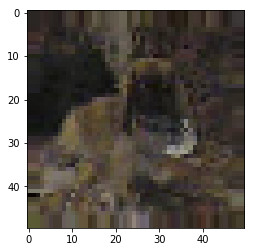

In [17]:
x,y = training_set.next()
for i in range(0,1):
    random_image = x[i]
    plt.imshow(random_image)
    plt.show()

## Define an earlystopping callback
* Import EarlyStopping - method to stop training when a monitored quantity has stopped improving.
* Define a callback.Set monitor as val_acc, patience as 5 and mode as max so that if val_acc does not improve over 5 epochs, terminate the training process.

In [18]:
# from keras.callbacks import EarlyStopping
# acc_callback = [EarlyStopping(monitor='val_acc', patience=5, mode='max')]

## Fit the model
* Invoke the fit_generator to fits the model on data generated batch-by-batch by a Python generator.
    * steps_per_epoch’ holds the number of training images, i.e 8000
    * A single epoch is a single step in training a neural network,set it at 25.
    * callbacks: List of callbacks to apply during training.
    * validation_data: test data
    * validation_steps: Total number of steps (batches of samples) to yield from  validation_data generator before stopping at the end of every epoch. It should typically be equal to the number of samples of your validation dataset divided by the batch size.

In [19]:
classifier.fit_generator(training_set,
steps_per_epoch = 8000,
epochs = 25,
#callbacks = acc_callback,
validation_data = test_set,
validation_steps = 2000)

Epoch 1/25
8000/8000 [==============================] - 2132s 267ms/step - loss: 0.3365 - acc: 0.8428 - val_loss: 0.6525 - val_acc: 0.7924
Epoch 2/25
2772/8000 [=========>....................] - ETA: 10:53 - loss: 0.1012 - acc: 0.9626

KeyboardInterrupt: 

## Evaluate the model
* Load model from disk.
* Preprocess and feed a random input image to the model for prediction.
* Test the accuracy and loss using the evaluate_generator method.


In [ ]:
json_file = open('saved_models/cnn_base_model.json', 'r')

loaded_classifier_json = json_file.read()

json_file.close()

loaded_classifier = model_from_json(loaded_classifier_json)

loaded_classifier.load_weights("saved_models/cnn_base_model.h5")
print("Loaded model from disk")

loaded_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (50, 50))

In [ ]:
plt.imshow(test_image)
plt.show()

In [ ]:
test_image = image.img_to_array(test_image)

In [ ]:
test_image = np.expand_dims(test_image, axis = 0)

In [ ]:
result = loaded_classifier.predict(test_image)

In [ ]:
if result[0][0] == 1:
    prediction = 'This is a dog'
else:
    prediction = 'This is a cat'

In [ ]:
print (prediction)

In [ ]:
loss,accuracy = loaded_classifier.evaluate_generator(test_set)

In [ ]:
print("Accuracy = {:.2f}".format(accuracy))

## Visualization tools
* plot_model : The keras.utils.vis_utils module provides utility functions to plot a Keras model (using graphviz).This will plot a graph of the model and save it to a file.
* quiver_engine : Interactive deep convolutional networks features visualization.    

In [ ]:
from keras.utils import plot_model
plot_model(classifier, to_file='classifier.png')

In [ ]:
from quiver_engine import server
server.launch(loaded_classifier)